#Function

In [81]:
import numpy as np

# Perceptron update rule function
def perceptron(X, y, theta_init, max_iter=10):
    theta = np.array(theta_init, dtype=float)
    for _ in range(max_iter):
        misclassified = False
        for i in range(len(y)):
            if np.sign(np.dot(theta, X[i])) != y[i]:  # Check misclassification
                theta += y[i] * X[i]  # Update rule
                misclassified = True
        if not misclassified:
            break  # Stop if no misclassifications
    return theta

In [82]:
X = np.array([[1,-2],[0,1],[-1.5,-1]])
y = np.array([1,-1,1])

In [83]:
print(perceptron(X,y,[0,0]))

[ 1. -2.]


Function with offset

In [84]:
import numpy as np

def perceptron_with_offset(X, y, theta_init, b_init, max_iter=10):
    theta = np.array(theta_init, dtype=float)
    b = b_init
    
    for _ in range(max_iter):
        misclassified = False
        for i in range(len(y)):
            if y[i] * (np.dot(theta, X[i]) + b) <= 0:  # Misclassification check
                theta += y[i] * X[i]  # Update theta
                b += y[i]  # Update bias
                misclassified = True
        if not misclassified:
            break  # Stop if no misclassifications
    
    return theta, b

In [6]:
import numpy as np
def perceptron(data, labels, params = {}, hook = None):    
    # if T not in params, default to 100
    T = params.get('T', 100)
    # Your implementation here
    d, n = data.shape
    theta = np.zeros((d,1))
    theta_0 = np.zeros(1)
    print("d = {}, n = {}, theta shape = {}, theta_0 shape = {}".format(d,n,theta.shape,theta_0.shape))
  
    for t in range(T):     
      for i in range(n):
        y = labels[0,i]
        x = data[:,i]
        
        a = np.dot(x,theta)+theta_0
        #print("a = {}".format(a))
        positive = np.sign(y*a)
        
        if np.sign(y*a) <=0: # update the thetas
          theta[:,0] = theta[:,0]+ y*x
          theta_0 = theta_0 + y
          
    print("shape x = {}, y = {}, theta = {}, theta_0 = {}".format(x.shape,y.shape,theta.shape,theta_0.shape))
    return (theta,theta_0)
X = np.array([[-3,2],[-1,1],[-1,-1],[2,2],[1,-1]])
y = np.array([[1],[-1],[-1],[-1],[-1]])

print(perceptron(X,y))

d = 5, n = 2, theta shape = (5, 1), theta_0 shape = (1,)


IndexError: index 1 is out of bounds for axis 1 with size 1

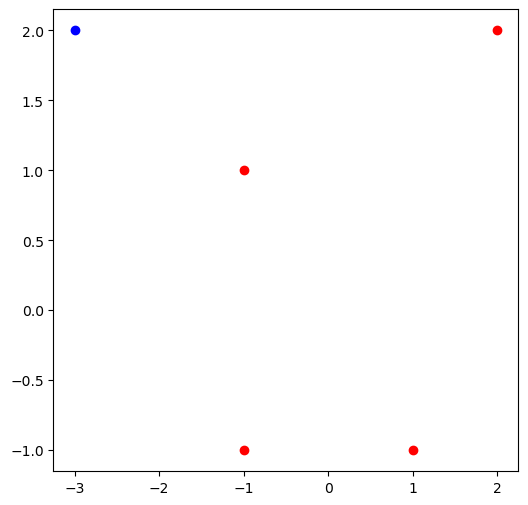

In [86]:
import matplotlib.pyplot as plt  
plt.figure(1,figsize=(6,6))
for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(X[i,0],X[i,1],color ='blue')
    else:
        plt.scatter(X[i,0],X[i,1],color ='red')

In [87]:
def perceptron_with_offset(X, y, theta_init, b_init, max_iter=10):
    theta = np.array(theta_init, dtype=float)
    b = b_init


    for _ in range(max_iter):
        misclassified = False
        for i in range(len(y)):
            if y[i] * (np.dot(theta, X[i]) + b) <= 0:  # Misclassification check
                theta += y[i] * X[i]  # Update theta
                b += y[i]  # Update bias
                misclassified = True
        if not misclassified:
            break  # Stop if no misclassifications
    
    return theta, b

C:\Users\User\AppData\Local\Temp\ipykernel_20288\3004426265.py:22: RuntimeWarning: divide by zero encountered in divide
  fig_y = -(theta[0]*fig_x + b)/theta[1]


(array([-3.,  0.]), -2)

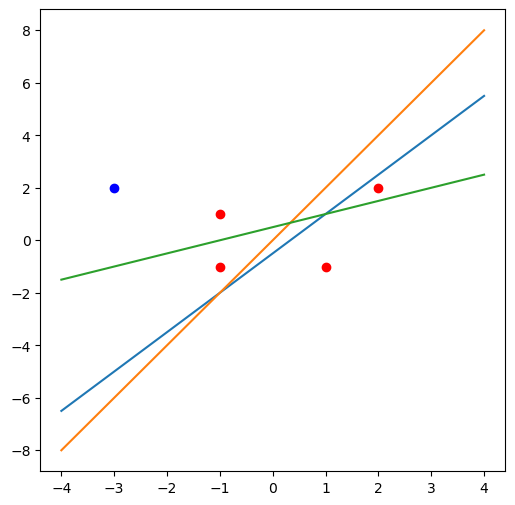

In [88]:
perceptron_with_offset(X,y,[0,0],0,1)

(array([-9., 17.]), 1)

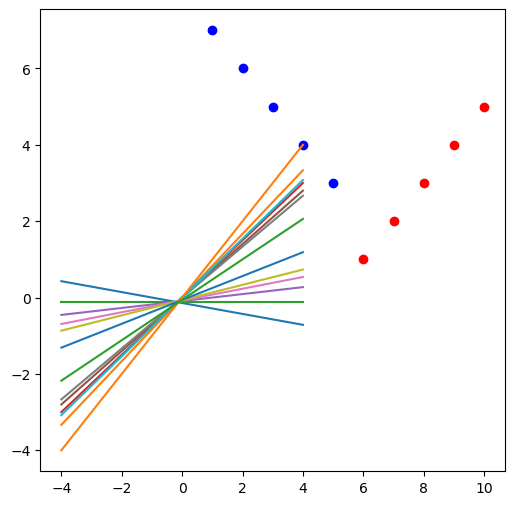

In [91]:
X_class_1 = np.array([[1, 7], [2, 6], [3, 5], [4, 4], [5, 3],[6, 1], [7, 2], [8, 3], [9, 4], [10, 5]])
y_c = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])

perceptron_with_offset(X_class_1,y_c,[0,0],0,100)

array([ 1., -2.])

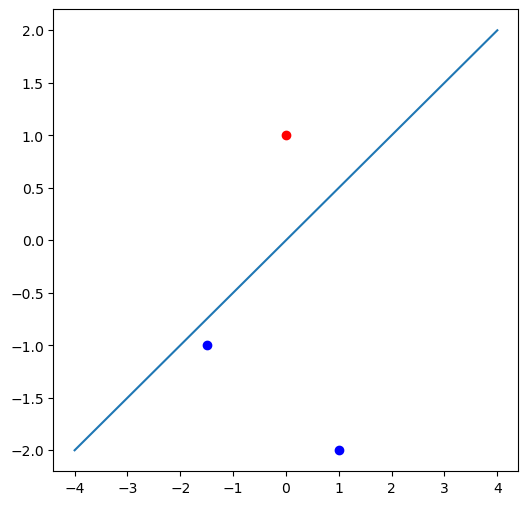

In [90]:
def perceptron(X, y, theta_init, max_iter=10):
    theta = np.array(theta_init, dtype=float)
    fig_x = np.linspace(-4,4,10)
    plt.figure(1,figsize=(6,6))
    for i in range(len(y)):
        if y[i] == 1:
            plt.scatter(X[i,0],X[i,1],color ='blue')
        else:
            plt.scatter(X[i,0],X[i,1],color ='red')
            
    for _ in range(max_iter):
        misclassified = False
        for i in range(len(y)):
            if np.sign(np.dot(theta, X[i])) != y[i]:  # Check misclassification
                theta += y[i] * X[i]  # Update rule
                misclassified = True

                
                fig_y = -(theta[0]*fig_x)/theta[1]       
                plt.figure(1)
                plt.plot(fig_x,fig_y)
        if not misclassified:
            break  # Stop if no misclassifications
    return theta

X = np.array([[1,-2],[0,1],[-1.5,-1]])
y = np.array([1,-1,1])

perceptron(X,y,[0,0])

In [ ]:
def perceptron_1(X, y, max_iterations=1000):
    weights = np.zeros(X.shape[0])  # Adjust to match the number of features
    mistakes = 0

    for _ in range(max_iterations):
        global_mistakes = 0
        for i in range(len(y)):
            # Calculate the prediction
            prediction = np.sign(np.dot(X[:, i], weights))  # Update the dot product computation
            # Update weights if prediction is wrong
            if prediction != y[i]:
                weights += y[i] * X[:, i]
                global_mistakes += 1
        mistakes += global_mistakes
        # Stop if no mistakes are made
        if global_mistakes == 0:
            break

    return mistakes